<a href="https://colab.research.google.com/github/kelly7y176/Logistic_Regression_LogLoss_Preactice/blob/main/L07_Machine_Learning_Solution_Logistic_Regression_LogLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression & Log-Loss — Solution Notebook

> All equations use block math with `$$` and `$$` delimiters. Make sure cells are **Markdown** for rendering in JupyterLab.


In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
GLOBAL_SEED = 42
np.random.seed(GLOBAL_SEED)


## We assign the integer 42 as a seed value.
A seed is like a starting point for the random number generator.
Using the same seed ensures that every time you run the code, you get the same sequence of random numbers.

Why 42?

It’s a common convention in programming (a playful reference to “The Answer to Life, the Universe, and Everything” from The Hitchhiker’s Guide to the Galaxy).
You can use any integer, but 42 is widely used as a default.

## 1. Load & Inspect the Data
Columns: `exam1`, `exam2`, `hours_studied`, `prep_course`, `admitted`.

'admitted' is the target variable.


In [11]:

df = pd.read_csv('logistic_regression_admissions.csv')
print(df.head())
print(df.describe())
print('Class balance:', df['admitted'].value_counts().to_dict())


       exam1      exam2  hours_studied  prep_course  admitted
0  77.395605  47.750587      12.118736            0         1
1  43.887844  76.143256      13.113267            0         1
2  85.859792  90.332787      39.659393            0         1
3  69.736803  72.069595      34.413936            0         1
4   9.417735  96.321122      16.706005            0         0
            exam1       exam2  hours_studied  prep_course    admitted
count  600.000000  600.000000     600.000000   600.000000  600.000000
mean    49.598655   50.421212      19.423525     0.323333    0.456667
std     28.722673   29.508750       8.258105     0.468139    0.498534
min      0.542983    0.051874       0.000000     0.000000    0.000000
25%     23.672424   24.514336      14.157966     0.000000    0.000000
50%     49.977907   49.338200      19.326803     0.000000    0.000000
75%     75.028856   76.470131      24.863678     1.000000    1.000000
max     99.910473   99.942191      40.000000     1.000000    1.00000

## 2. Prepare Features and Labels



Standardize continuous features and split 80/20.


In [12]:
#write your code here
from sklearn.model_selection import train_test_split

X = df[['exam1', 'exam2', 'hours_studied', 'prep_course']].values
y = df['admitted'].values

cont_idx = [0, 1, 2]
X[:, cont_idx] = (X[:, cont_idx] - X[:, cont_idx].mean(axis=0)) / X[:, cont_idx].std(axis=0)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=GLOBAL_SEED, stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (480, 4), Test: (120, 4)


## 3. Mathematical Background







**Sigmoid:**

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

**Model:**

$$
\hat{y} = \sigma(X\mathbf{w} + b)
$$

**Binary Cross-Entropy (Log-Loss):**

$$
\mathcal{L}(y,\hat{y}) = -\frac{1}{n}\sum_{i=1}^n \Big( y_i\,\log(\hat{y}_i) + (1-y_i)\,\log(1-\hat{y}_i) \Big)
$$

**Gradients (vectorized):**

$$
\nabla_{\mathbf{w}}\,\mathcal{L} = \frac{1}{n} X^{\top} (\hat{y} - y),\quad
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)
$$

## 4. Implementation: Logistic Regression from Scratch


In [13]:

# Hints: define sigmoid function, log_loss, and accuracy respectively and calculate the training log-loss.

#def sigmoid(z):
def sigmoid(z):
    """Sigmoid function σ(z) = 1/(1+e^(-z))"""
    return 1 / (1 + np.exp(-z))

#def log_loss(y_true, y_pred, eps=1e-12):
def log_loss(y_true, y_pred, eps=1e-12):
    """Binary cross-entropy"""
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

#def accuracy(y_true, y_pred_proba, threshold=0.5):
def accuracy(y_true, y_pred_proba, threshold=0.5):
    """Accuracy with 0.5 threshold"""
    y_pred = (y_pred_proba >= threshold).astype(int)
    return np.mean(y_true == y_pred)

#write your code to implement logistic regression

## 5. Evaluate on the Test Set







Epoch    0 | Loss 0.6931
Epoch  200 | Loss 0.4107
Epoch  400 | Loss 0.3872
Epoch  600 | Loss 0.3798
Epoch  800 | Loss 0.3764
Epoch 1000 | Loss 0.3745

Done training!


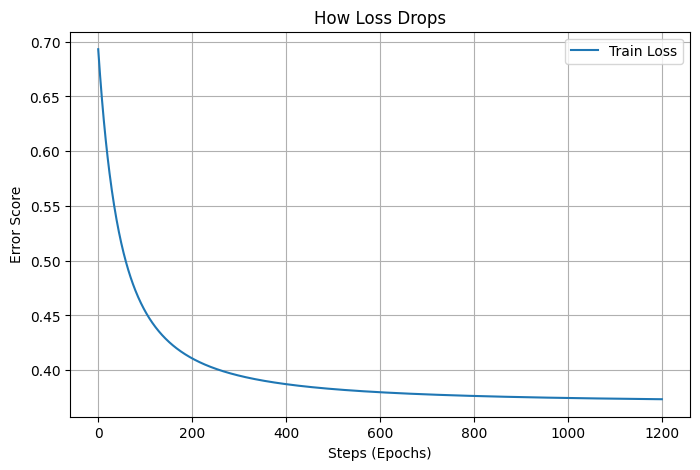

In [18]:
#write your code here
def train_logistic_regression(X, y, lr=0.01, epochs=1000):
    n, m = X.shape
    w = np.zeros(m)
    b = 0.0
    losses = []

    for epoch in range(epochs):

        z = X @ w + b
        y_hat = sigmoid(z)

        loss = log_loss(y, y_hat)
        losses.append(loss)

        dw = X.T @ (y_hat - y) / n  # .T is flip
        db = np.sum(y_hat - y) / n

        w -= lr * dw
        b -= lr * db

        if epoch % 200 == 0:
            print(f"Epoch {epoch:4d} | Loss {loss:.4f}")

    return w, b, losses

w, b, train_losses = train_logistic_regression(X_train, y_train, lr=0.05, epochs=1200)
print("\nDone training!")

plt.figure(figsize=(8,5))
plt.plot(train_losses, label='Train Loss')
plt.title('How Loss Drops')
plt.xlabel('Steps (Epochs)')
plt.ylabel('Error Score')
plt.grid(True)
plt.legend()
plt.show()



## 6. Learning Curve (Loss vs. Epoch)


In [19]:
#calculate log-loss, accuracy, and confusion matrix

# Guess on test
z_test = X_test @ w + b
y_test_proba = sigmoid(z_test)  # Chances

# Scores
test_loss = log_loss(y_test, y_test_proba)
test_acc  = accuracy(y_test, y_test_proba)

print(f"Test Loss: {test_loss:.4f}")  # How wrong
print(f"Test Accuracy: {test_acc:.4%}")  # Percent right

# Confusion: Table of right/wrong types
def confusion_matrix(y_true, y_proba, thresh=0.5):
    y_pred = (y_proba >= thresh).astype(int)
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True yes
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True no
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False yes
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False no
    return np.array([[TN, FP], [FN, TP]])

cm = confusion_matrix(y_test, y_test_proba)
print("Confusion Table:")
print(cm)


Test Loss: 0.4515
Test Accuracy: 78.3333%
Confusion Table:
[[52 13]
 [13 42]]


## 7. Interpreting the Learned Weights
A positive weight increases the log-odds of admission; a negative weight decreases it.


In [20]:

#calculate the coefficients of the data features, i.e. exam1,2, hours_studied, prep_course
features = ['exam1', 'exam2', 'hours_studied', 'prep_course']

print("What each means:")
for name, coef in zip(features, w):
    direction = "helps" if coef > 0 else "hurts"
    print(f"  {name:15} : {coef:.4f}  →  {direction} getting admitted")

print(f"\nExtra shift (bias): {b:.4f}")


What each means:
  exam1           : 1.4086  →  helps getting admitted
  exam2           : 1.7915  →  helps getting admitted
  hours_studied   : 0.5364  →  helps getting admitted
  prep_course     : 0.8551  →  helps getting admitted

Extra shift (bias): -0.5624
